In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import typing as t

In [4]:
def initial_weights(module: nn.Module):
    if isinstance(module, nn.Conv2d):
        torch.nn.init.zeros_(module.bias)
        torch.nn.init.constant_(module.weight, 1)

class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=1, stride=1)
        self.apply(initial_weights)

    def forward(self, x: torch.Tensor):
        return self.conv(x)

In [72]:
model = Model()
initial_lr = 0.01
optimizer = SGD(params=model.parameters(), lr=initial_lr)

In [7]:
def draw(lrs: t.List, label: str):
    plt.plot(lrs, label=label)
    plt.legend()
    plt.show()

## 一、LambdaLR 函数式学习率调整策略
学习曲率的衰减按照每一epoch，基于lr_lambda接受的函数计算, `lr[i] = 1 / (i + 1)`


初始化的学习率： 0.01
当前epoch-1学习率: 0.01
当前epoch-2学习率: 0.005
当前epoch-3学习率: 0.003333333333333333
当前epoch-4学习率: 0.0025
当前epoch-5学习率: 0.002
当前epoch-6学习率: 0.0016666666666666666
当前epoch-7学习率: 0.0014285714285714286
当前epoch-8学习率: 0.00125
当前epoch-9学习率: 0.0011111111111111111
当前epoch-10学习率: 0.001
当前epoch-11学习率: 0.0009090909090909091
当前epoch-12学习率: 0.0008333333333333333
当前epoch-13学习率: 0.0007692307692307693
当前epoch-14学习率: 0.0007142857142857143
当前epoch-15学习率: 0.0006666666666666666
当前epoch-16学习率: 0.000625
当前epoch-17学习率: 0.0005882352941176471
当前epoch-18学习率: 0.0005555555555555556
当前epoch-19学习率: 0.0005263157894736842
当前epoch-20学习率: 0.0005
当前epoch-21学习率: 0.0004761904761904762
当前epoch-22学习率: 0.00045454545454545455
当前epoch-23学习率: 0.0004347826086956522
当前epoch-24学习率: 0.00041666666666666664
当前epoch-25学习率: 0.0004
当前epoch-26学习率: 0.00038461538461538467
当前epoch-27学习率: 0.00037037037037037035
当前epoch-28学习率: 0.00035714285714285714
当前epoch-29学习率: 0.0003448275862068966
当前epoch-30学习率: 0.0003333333333333333


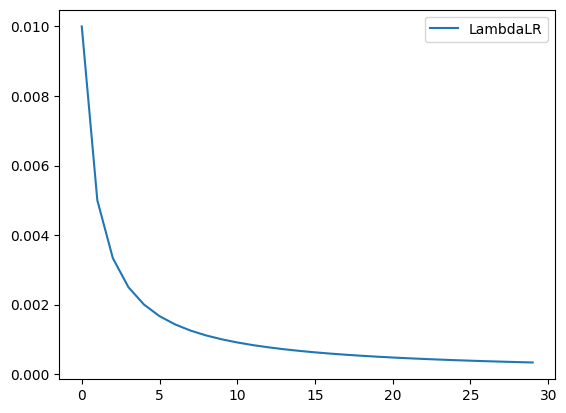

In [8]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
# 使用schedular接管optimizer的学习率的更新后，在optimizer.param_groups中增加参数initial_lr
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 1 / (epoch + 1), last_epoch=-1)

print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, 30, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

draw(res, 'LambdaLR')

## 二、StepLR 阶段性学习率调整策略
每隔step_size的epoch, 学习率衰减为原来的0.5倍, `lr[i] = lr[i - k] * gamma`, 其中`k == step_size`

初始化的学习率： 0.01
当前epoch-1学习率: 0.01
当前epoch-6学习率: 0.01
当前epoch-11学习率: 0.005
当前epoch-16学习率: 0.005
当前epoch-21学习率: 0.0025
当前epoch-26学习率: 0.0025
当前epoch-31学习率: 0.00125
当前epoch-36学习率: 0.00125
当前epoch-41学习率: 0.000625
当前epoch-46学习率: 0.000625


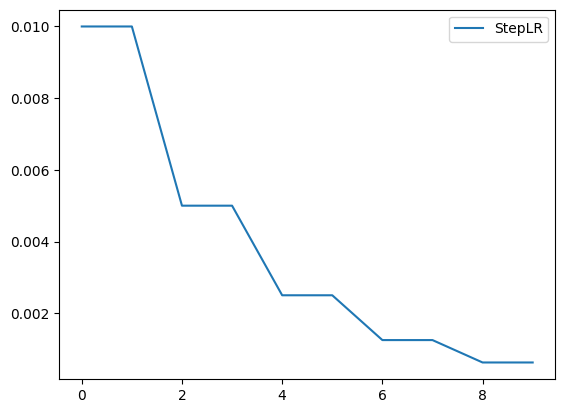

In [152]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
# last_epoch为-1表示从头开始训练
# 每隔step_size的epoch, 学习率衰减为原来的0.5倍
schedular = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, 50, 5):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    schedular.step()
draw(res, 'StepLR')

## 三、MultipleStepLR 多阶段学习率调整策略
按照milestones的epoch间隔, 学习率衰减为上一段学习率的0.5倍, 和StepLR区别在于MultipleStepLR是可控的间隔

初始化的学习率： 0.01
当前epoch-1学习率: 0.01
当前epoch-2学习率: 0.01
当前epoch-3学习率: 0.005
当前epoch-4学习率: 0.005
当前epoch-5学习率: 0.005
当前epoch-6学习率: 0.0025
当前epoch-7学习率: 0.0025
当前epoch-8学习率: 0.0025
当前epoch-9学习率: 0.00125
当前epoch-10学习率: 0.00125
当前epoch-11学习率: 0.00125
当前epoch-12学习率: 0.00125
当前epoch-13学习率: 0.000625
当前epoch-14学习率: 0.000625
当前epoch-15学习率: 0.000625
当前epoch-16学习率: 0.000625
当前epoch-17学习率: 0.0003125
当前epoch-18学习率: 0.0003125
当前epoch-19学习率: 0.0003125
当前epoch-20学习率: 0.0003125
当前epoch-21学习率: 0.0003125
当前epoch-22学习率: 0.0003125
当前epoch-23学习率: 0.0003125
当前epoch-24学习率: 0.0003125
当前epoch-25学习率: 0.0003125
当前epoch-26学习率: 0.00015625
当前epoch-27学习率: 0.00015625
当前epoch-28学习率: 0.00015625
当前epoch-29学习率: 0.00015625
当前epoch-30学习率: 0.00015625


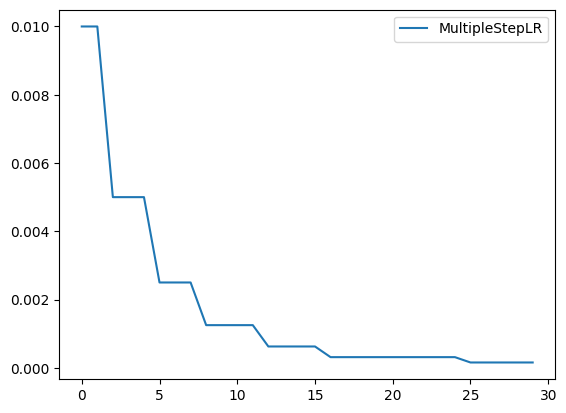

In [153]:
# 按照milestones的epoch间隔, 学习率衰减为原来的0.5倍
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
schedular = lr_scheduler.MultiStepLR(optimizer, milestones=[2, 5, 8, 12, 16, 25], gamma=0.5)
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, 30, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    schedular.step()
draw(res, 'MultipleStepLR')

## 四、MultiplicativeLR 函数式学习率因子调整策略
将每个参数组的学习率乘以指定函数中计算出的的因子， `lr[i] = inital_lr * (1 / (i + 1))`

初始化的学习率： 0.01
当前epoch-1学习率: 0.01
当前epoch-2学习率: 0.005
当前epoch-3学习率: 0.0016666666666666666
当前epoch-4学习率: 0.00041666666666666664
当前epoch-5学习率: 8.333333333333333e-05
当前epoch-6学习率: 1.3888888888888888e-05
当前epoch-7学习率: 1.984126984126984e-06
当前epoch-8学习率: 2.48015873015873e-07
当前epoch-9学习率: 2.7557319223985888e-08
当前epoch-10学习率: 2.755731922398589e-09
当前epoch-11学习率: 2.505210838544172e-10
当前epoch-12学习率: 2.08767569878681e-11
当前epoch-13学习率: 1.6059043836821616e-12
当前epoch-14学习率: 1.1470745597729724e-13
当前epoch-15学习率: 7.647163731819816e-15
当前epoch-16学习率: 4.779477332387385e-16
当前epoch-17学习率: 2.81145725434552e-17
当前epoch-18学习率: 1.5619206968586222e-18
当前epoch-19学习率: 8.220635246624327e-20
当前epoch-20学习率: 4.1103176233121636e-21
当前epoch-21学习率: 1.9572941063391255e-22
当前epoch-22学习率: 8.89679139245057e-24
当前epoch-23学习率: 3.8681701706306825e-25
当前epoch-24学习率: 1.6117375710961175e-26
当前epoch-25学习率: 6.446950284384471e-28
当前epoch-26学习率: 2.4795962632247965e-29
当前epoch-27学习率: 9.183689863795541e-31
当前epoch-28学习率: 3.27988

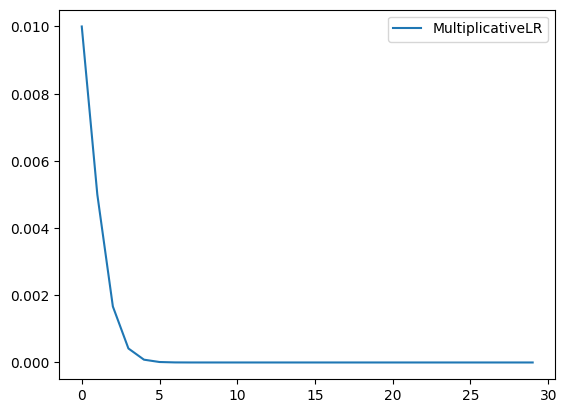

In [155]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
schedular = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lambda epoch: 1 / (epoch + 1))
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, 30, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    schedular.step()
draw(res, 'MultiplicativeLR')

## 五、ConstantLR 常数学习率因子调整策略
学习率因子为常量， 学习率在total_iters个epoch内衰减为一开始的0.5倍, 计算的`lr[i] = inital_lr * factor, i <= total_iters`, 超过total_iters个epoch后，学习率回到最初值

初始化的学习率： 0.01
当前epoch-1学习率: 0.005
当前epoch-2学习率: 0.005
当前epoch-3学习率: 0.005
当前epoch-4学习率: 0.005
当前epoch-5学习率: 0.005
当前epoch-6学习率: 0.005
当前epoch-7学习率: 0.005
当前epoch-8学习率: 0.005
当前epoch-9学习率: 0.005
当前epoch-10学习率: 0.005
当前epoch-11学习率: 0.005
当前epoch-12学习率: 0.005
当前epoch-13学习率: 0.005
当前epoch-14学习率: 0.005
当前epoch-15学习率: 0.005
当前epoch-16学习率: 0.005
当前epoch-17学习率: 0.005
当前epoch-18学习率: 0.005
当前epoch-19学习率: 0.005
当前epoch-20学习率: 0.005
当前epoch-21学习率: 0.01
当前epoch-22学习率: 0.01
当前epoch-23学习率: 0.01
当前epoch-24学习率: 0.01
当前epoch-25学习率: 0.01
当前epoch-26学习率: 0.01
当前epoch-27学习率: 0.01
当前epoch-28学习率: 0.01
当前epoch-29学习率: 0.01
当前epoch-30学习率: 0.01


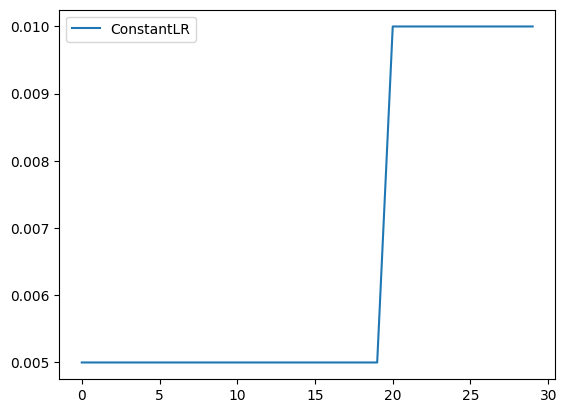

In [158]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
schedular = lr_scheduler.ConstantLR(optimizer, factor=0.5, total_iters=20)
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, 30, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    schedular.step()
draw(res, 'ConstantLR')

## 六、LinearLR 线性学习率因子调整策略
学习率因子以线性方式改变，学习率以线性方式衰减或增加, 直到达到指定的total_iters个epoch,
`lr[i] = ((end_factor - start_factor) / total_iters) * i * initial_lr, i <= total_iters`, 当epoch超过total_iters时，学习因子恒为0.1

初始化的学习率： 0.01
当前epoch-1学习率: 0.008
当前epoch-2学习率: 0.007
当前epoch-3学习率: 0.006000000000000001
当前epoch-4学习率: 0.005
当前epoch-5学习率: 0.004
当前epoch-6学习率: 0.003
当前epoch-7学习率: 0.002
当前epoch-8学习率: 0.001
当前epoch-9学习率: 0.001
当前epoch-10学习率: 0.001
当前epoch-11学习率: 0.001
当前epoch-12学习率: 0.001
当前epoch-13学习率: 0.001
当前epoch-14学习率: 0.001
当前epoch-15学习率: 0.001
当前epoch-16学习率: 0.001
当前epoch-17学习率: 0.001
当前epoch-18学习率: 0.001
当前epoch-19学习率: 0.001
当前epoch-20学习率: 0.001
当前epoch-21学习率: 0.001
当前epoch-22学习率: 0.001
当前epoch-23学习率: 0.001
当前epoch-24学习率: 0.001
当前epoch-25学习率: 0.001
当前epoch-26学习率: 0.001
当前epoch-27学习率: 0.001
当前epoch-28学习率: 0.001
当前epoch-29学习率: 0.001
当前epoch-30学习率: 0.001


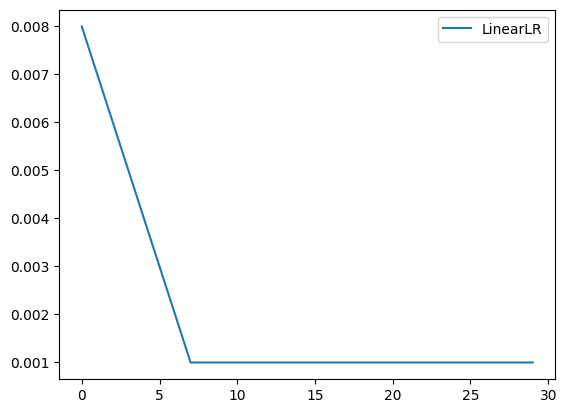

In [172]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
schedular = lr_scheduler.LinearLR(optimizer, start_factor=0.8, end_factor=0.1, total_iters=7)
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, 30, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    schedular.step()
draw(res, 'LinearLR')

## 七、ExponentialLR 指数式学习率调整策略
学习率调整公式以gamma为底, 以epoch为指数计算出新的学习率, `lr[i] = initial_lr * exp(gamma, epoch)`

初始化的学习率： 0.01
当前epoch-1学习率: 0.01   初始学习率0.01 * 0.5的0次方
当前epoch-2学习率: 0.005   初始学习率0.01 * 0.5的1次方
当前epoch-3学习率: 0.0025   初始学习率0.01 * 0.5的2次方
当前epoch-4学习率: 0.00125   初始学习率0.01 * 0.5的3次方
当前epoch-5学习率: 0.000625   初始学习率0.01 * 0.5的4次方
当前epoch-6学习率: 0.0003125   初始学习率0.01 * 0.5的5次方
当前epoch-7学习率: 0.00015625   初始学习率0.01 * 0.5的6次方
当前epoch-8学习率: 7.8125e-05   初始学习率0.01 * 0.5的7次方
当前epoch-9学习率: 3.90625e-05   初始学习率0.01 * 0.5的8次方
当前epoch-10学习率: 1.953125e-05   初始学习率0.01 * 0.5的9次方
当前epoch-11学习率: 9.765625e-06   初始学习率0.01 * 0.5的10次方
当前epoch-12学习率: 4.8828125e-06   初始学习率0.01 * 0.5的11次方
当前epoch-13学习率: 2.44140625e-06   初始学习率0.01 * 0.5的12次方
当前epoch-14学习率: 1.220703125e-06   初始学习率0.01 * 0.5的13次方
当前epoch-15学习率: 6.103515625e-07   初始学习率0.01 * 0.5的14次方
当前epoch-16学习率: 3.0517578125e-07   初始学习率0.01 * 0.5的15次方
当前epoch-17学习率: 1.52587890625e-07   初始学习率0.01 * 0.5的16次方
当前epoch-18学习率: 7.62939453125e-08   初始学习率0.01 * 0.5的17次方
当前epoch-19学习率: 3.814697265625e-08   初始学习率0.01 * 0.5的18次方
当前epoch-20学习率: 1.9073486328125e-08   初始学习率0.0

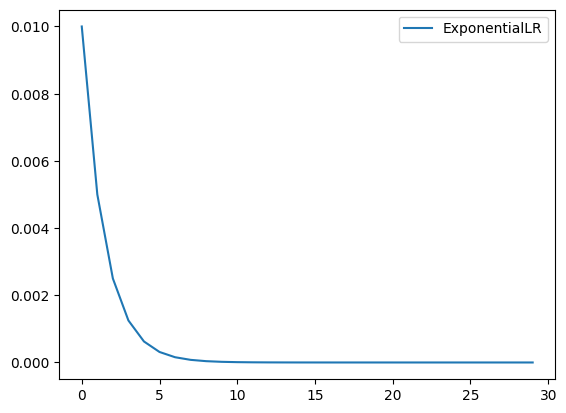

In [173]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
gamma = 0.5
schedular = lr_scheduler.ExponentialLR(optimizer, gamma=gamma)
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, 30, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}   初始学习率{optimizer.defaults["lr"]} * {gamma}的{epoch}次方')
    res.append(optimizer.param_groups[0]["lr"])
    schedular.step()
draw(res, 'ExponentialLR')

## 八、PolynomialLR 多项式学习率调整策略
在给定的total_iters的epoch内，学习率不断下降，直至为0, 使用多项式作为学习率的计算公式，多项式最高次幂为power, 超过total_iters的epoch的学习率为0

初始化的学习率： 0.01
当前epoch-1学习率: 0.01
当前epoch-2学习率: 0.009344444444444445
当前epoch-3学习率: 0.008711111111111112
当前epoch-4学习率: 0.008100000000000001
当前epoch-5学习率: 0.0075111111111111125
当前epoch-6学习率: 0.006944444444444446
当前epoch-7学习率: 0.006400000000000001
当前epoch-8学习率: 0.005877777777777779
当前epoch-9学习率: 0.00537777777777778
当前epoch-10学习率: 0.0049
当前epoch-11学习率: 0.004444444444444445
当前epoch-12学习率: 0.004011111111111111
当前epoch-13学习率: 0.0036000000000000003
当前epoch-14学习率: 0.003211111111111111
当前epoch-15学习率: 0.0028444444444444446
当前epoch-16学习率: 0.0025
当前epoch-17学习率: 0.002177777777777778
当前epoch-18学习率: 0.0018777777777777781
当前epoch-19学习率: 0.0016000000000000005
当前epoch-20学习率: 0.001344444444444445
当前epoch-21学习率: 0.0011111111111111118
当前epoch-22学习率: 0.0009000000000000006
当前epoch-23学习率: 0.0007111111111111117
当前epoch-24学习率: 0.0005444444444444445
当前epoch-25学习率: 0.0004
当前epoch-26学习率: 0.00027777777777777783
当前epoch-27学习率: 0.00017777777777777784
当前epoch-28学习率: 0.00010000000000000003
当前epoch-29学习率: 4.44444444444444

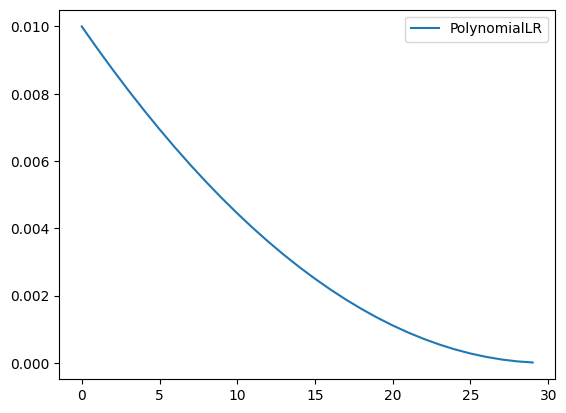

In [179]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
schedular = lr_scheduler.PolynomialLR(optimizer, power=2, total_iters=30)
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, 30, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    schedular.step()

draw(res, 'PolynomialLR')

## 九、CosineAnnealingLR 余弦退火学习率调整策略
本质为余弦函数, T_max为半周期大小（迭代次数的最大值), eta_min为学习率的最小值，最大学习率为`optimizer.defaults['lr']` 或者为
`optimizer.param_groups[0]["lr"]`, 相位为0。学习率有增，有减，防止模型陷入鞍点---不是局部最小值的驻点。

初始化的学习率： 0.01
当前epoch-1学习率: 0.01
当前epoch-2学习率: 0.010187460799314207
当前epoch-3学习率: 0.010749103375124608
当前epoch-4学习率: 0.011682711180774574
当前epoch-5学习率: 0.012984599692780069
当前epoch-6学习率: 0.014649630951960424
当前epoch-7学习率: 0.01667123384061614
当前epoch-8学习率: 0.01904143001572814
当前epoch-9学习率: 0.021750865395832986
当前epoch-10学习率: 0.02478884707730858
当前epoch-11学习率: 0.028143385534380005
当前epoch-12学习率: 0.031801241936300045
当前epoch-13学习率: 0.035747980394965934
当前epoch-14学习率: 0.03996802493677459
当前epoch-15学习率: 0.0444447209738745
当前epoch-16学习率: 0.049160401032215056
当前epoch-17学习率: 0.05409645447699535
当前epoch-18学习率: 0.05923340096033708
当前epoch-19学习率: 0.06455096730131812
当前epoch-20学习率: 0.0700281674949556
当前epoch-21学习率: 0.07564338553438002
当前epoch-22学习率: 0.08137446071933883
当前epoch-23学习率: 0.08719877511435617
当前epoch-24学习率: 0.09309334281139109
当前epoch-25学习率: 0.09903490064471523
当前epoch-26学习率: 0.10500000000000001
当前epoch-27学习率: 0.11096509935528479
当前epoch-28学习率: 0.11690665718860892
当前epoch-29学习率: 0.12280

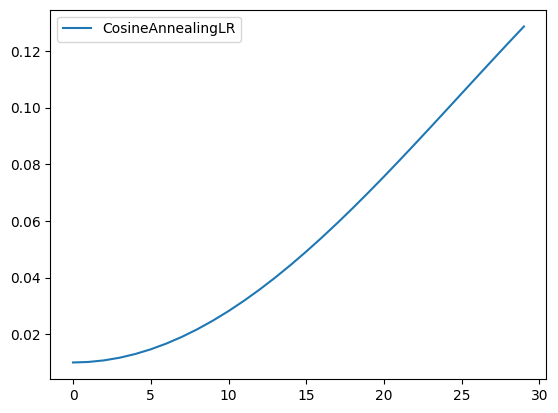

In [184]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
schedular = lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=0.2)
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, 30, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    schedular.step()

draw(res, 'CosineAnnealingLR')

## 十、ChainedScheduler链式连续学习率调整策略
多个scheduler在每个epoch共同作用，可以理解为在某一epoch的学习率值由当前时刻计算出来的多个scheduler的学习率相互作用。所以学习率整体上来看是连续的。

初始化的学习率： 0.01
当前epoch-1学习率: 0.01
当前epoch-2学习率: 0.00967
当前epoch-3学习率: 0.008406000000000002
当前epoch-4学习率: 0.00901
当前epoch-5学习率: 0.007812
当前epoch-6学习率: 0.008350000000000002
当前epoch-7学习率: 0.007218000000000001
当前epoch-8学习率: 0.007689999999999999
当前epoch-9学习率: 0.006624000000000001
当前epoch-10学习率: 0.00703
当前epoch-11学习率: 0.006030000000000001
当前epoch-12学习率: 0.006370000000000001
当前epoch-13学习率: 0.005436000000000001
当前epoch-14学习率: 0.00571
当前epoch-15学习率: 0.004842
当前epoch-16学习率: 0.00505
当前epoch-17学习率: 0.004248
当前epoch-18学习率: 0.00439
当前epoch-19学习率: 0.003654
当前epoch-20学习率: 0.0037300000000000007
当前epoch-21学习率: 0.0030600000000000002
当前epoch-22学习率: 0.0030700000000000007
当前epoch-23学习率: 0.0024660000000000007
当前epoch-24学习率: 0.00241
当前epoch-25学习率: 0.001872
当前epoch-26学习率: 0.0017499999999999996
当前epoch-27学习率: 0.0012779999999999998
当前epoch-28学习率: 0.0010899999999999998
当前epoch-29学习率: 0.0006839999999999998
当前epoch-30学习率: 0.00043


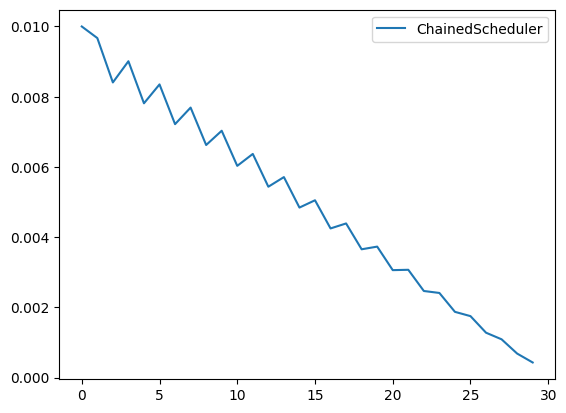

In [68]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
epochs = 30
# 定义了三个scheduler，分别为二次多项式PolynomialLR, 分阶段StepLR以及自定义学习率调整函数的LambdaLR
scheduler1 = lr_scheduler.PolynomialLR(optimizer, power=2, total_iters=epochs)
scheduler2 = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)
scheduler3 = lr_scheduler.LambdaLR(optimizer, lambda x: (1 - x / epochs) * (1 - 0.01) + 0.01)
scheduler = lr_scheduler.ChainedScheduler([scheduler1, scheduler3, scheduler2])
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, epochs, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

draw(res, 'ChainedScheduler')

## 十一、SequentialLR 顺序分段式学习率调整策略
原理类似与ChainedScheduler, 但与ChainedScheduler不同的是，SequentialLR额外接受milestones参数，告诉调度器在不同epoch阶段，使用不同的scheduler
来调整学习率，每个scheduler作用于一小段epoch。所以学习率曲线图看起来是分段式。

初始化的学习率： 0.01
当前epoch-1学习率: 0.01
当前epoch-2学习率: 0.009344444444444445
当前epoch-3学习率: 0.008711111111111112
当前epoch-4学习率: 0.008100000000000001
当前epoch-5学习率: 0.0075111111111111125
当前epoch-6学习率: 0.006944444444444446
当前epoch-7学习率: 0.006400000000000001
当前epoch-8学习率: 0.005877777777777779
当前epoch-9学习率: 0.00537777777777778
当前epoch-10学习率: 0.0049
当前epoch-11学习率: 0.01
当前epoch-12学习率: 0.00967
当前epoch-13学习率: 0.009340000000000001
当前epoch-14学习率: 0.00901
当前epoch-15学习率: 0.00868
当前epoch-16学习率: 0.008350000000000002
当前epoch-17学习率: 0.008020000000000001
当前epoch-18学习率: 0.007689999999999999
当前epoch-19学习率: 0.007360000000000001
当前epoch-20学习率: 0.00703
当前epoch-21学习率: 0.01
当前epoch-22学习率: 0.01
当前epoch-23学习率: 0.01
当前epoch-24学习率: 0.006999999999999999
当前epoch-25学习率: 0.006999999999999999
当前epoch-26学习率: 0.006999999999999999
当前epoch-27学习率: 0.004899999999999999
当前epoch-28学习率: 0.004899999999999999
当前epoch-29学习率: 0.004899999999999999
当前epoch-30学习率: 0.003429999999999999


D:\projects\cv-deep-learning\venv\lib\site-packages\torch\optim\lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


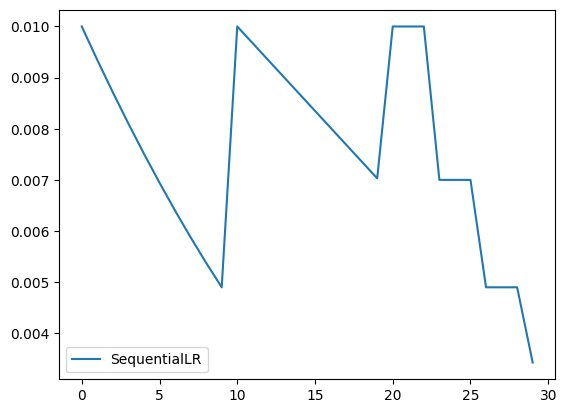

In [73]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
epochs = 30
# 定义了三个scheduler，分别为二次多项式PolynomialLR, 分阶段StepLR以及自定义学习率调整函数的LambdaLR
scheduler1 = lr_scheduler.PolynomialLR(optimizer, power=2, total_iters=epochs)
scheduler2 = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)
scheduler3 = lr_scheduler.LambdaLR(optimizer, lambda x: (1 - x / epochs) * (1 - 0.01) + 0.01)
scheduler = lr_scheduler.SequentialLR(optimizer, [scheduler1, scheduler3, scheduler2], milestones=[10, 20])
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, epochs, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

draw(res, 'SequentialLR')

## 十二、CyclicLR循环学习率调整策略
CyclicLR的曲线看上去像是不断的上坡和下坡，其中base_lr为谷底的学习率, max_lr为峰顶的学习率, step_size_up表示从波谷到峰顶所需要的epoch数,
而step_size_down表示从峰顶到波谷所需要的epoch数。CyclicLR不是一直降低，也是为了避免模型陷入鞍点。

初始化的学习率： 0.01
当前epoch-1学习率: 0.01
当前epoch-2学习率: 0.0035000000000000014
当前epoch-3学习率: 0.004999999999999999
当前epoch-4学习率: 0.006500000000000001
当前epoch-5学习率: 0.007999999999999998
当前epoch-6学习率: 0.007
当前epoch-7学习率: 0.005999999999999999
当前epoch-8学习率: 0.005000000000000001
当前epoch-9学习率: 0.004
当前epoch-10学习率: 0.003000000000000001
当前epoch-11学习率: 0.002
当前epoch-12学习率: 0.0035000000000000014
当前epoch-13学习率: 0.005000000000000003
当前epoch-14学习率: 0.006499999999999997
当前epoch-15学习率: 0.007999999999999998
当前epoch-16学习率: 0.007
当前epoch-17学习率: 0.005999999999999999
当前epoch-18学习率: 0.004999999999999998
当前epoch-19学习率: 0.004000000000000002
当前epoch-20学习率: 0.003000000000000001
当前epoch-21学习率: 0.002
当前epoch-22学习率: 0.0035000000000000014
当前epoch-23学习率: 0.005000000000000003
当前epoch-24学习率: 0.006499999999999997
当前epoch-25学习率: 0.007999999999999998
当前epoch-26学习率: 0.007
当前epoch-27学习率: 0.005999999999999999
当前epoch-28学习率: 0.004999999999999998
当前epoch-29学习率: 0.004000000000000002
当前epoch-30学习率: 0.003000000000000001
当前epoch-31学习率: 0.0

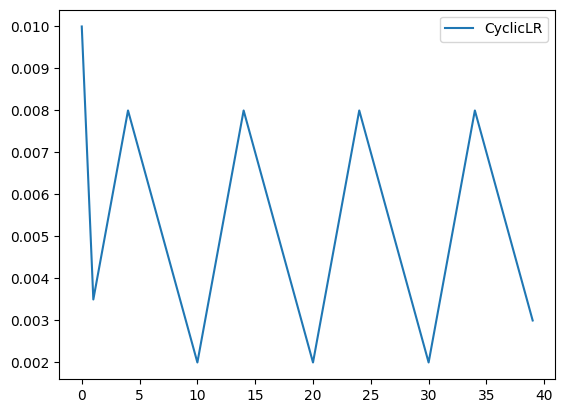

In [82]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
epochs = 40
scheduler = lr_scheduler.CyclicLR(optimizer, base_lr=0.002, max_lr=0.008, step_size_up=4, step_size_down=6)
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, epochs, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

draw(res, 'CyclicLR')

## 十三、OneCyclicLR 单周期学习率
OneCycleLR顾名思义就像是CyclicLR的一周期版本，它也有多个参数，max_lr就是最大学习率，pct_start是学习率上升部分所占比例，一开始的学习率为max_lr/div_factor,最终的学习率为max_lr/final_div_factor，总的迭代次数为total_steps。


初始化的学习率： 0.01
当前epoch-1学习率: 0.0009999999999999992
当前epoch-2学习率: 0.0010230880447364716
当前epoch-3学习率: 0.0010921152643637733
当前epoch-4学习率: 0.001206373346199779
当前epoch-5学习率: 0.0013646898477089608
当前epoch-6学习率: 0.0015654402273493802
当前epoch-7学习率: 0.0018065645145672552
当前epoch-8学习率: 0.0020855884478824405
当前epoch-9学习率: 0.0023996488641594097
当前epoch-10学习率: 0.0027455230785355163
当前epoch-11学习率: 0.0031196619535286685
当前epoch-12学习率: 0.0035182263179906444
当前epoch-13学习率: 0.003937126362198309
当前epoch-14学习率: 0.004372063604835757
当前epoch-15学习率: 0.004818575001229404
当前epoch-16学习率: 0.0052720787402257925
当前epoch-17学习率: 0.005727921259774207
当前epoch-18学习率: 0.006181424998770594
当前epoch-19学习率: 0.0066279363951642425
当前epoch-20学习率: 0.007062873637801691
当前epoch-21学习率: 0.007481773682009354
当前epoch-22学习率: 0.00788033804647133
当前epoch-23学习率: 0.008254476921464483
当前epoch-24学习率: 0.00860035113584059
当前epoch-25学习率: 0.008914411552117559
当前epoch-26学习率: 0.009193435485432742
当前epoch-27学习率: 0.00943455977265062
当前epoch-28学习率

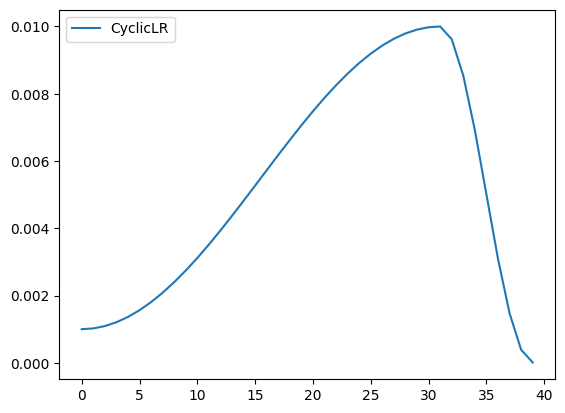

In [89]:
optimizer.param_groups[0]["lr"] = optimizer.defaults['lr']
epochs = 40
scheduler = lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, pct_start=0.8, total_steps=epochs, div_factor=10, final_div_factor=100)
print("初始化的学习率：", optimizer.defaults['lr'])
res = []
for epoch in range(0, epochs, 1):
    optimizer.zero_grad()
    optimizer.step()
    print(f'当前epoch-{epoch + 1}学习率: {optimizer.param_groups[0]["lr"]}')
    res.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

draw(res, 'CyclicLR')